# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.026656e+01     6.713158e+00
 * time: 0.002452850341796875
     1     3.016794e+01     5.007854e+00
 * time: 0.00915384292602539
     2     2.128293e+01     5.036160e+00
 * time: 0.019731998443603516
     3     1.160856e+01     1.535244e+00
 * time: 0.032286882400512695
     4     1.025684e+01     1.659149e+00
 * time: 0.04091000556945801
     5     9.882383e+00     8.919693e-01
 * time: 0.049904823303222656
     6     9.433145e+00     7.813979e-01
 * time: 0.058812856674194336
     7     9.011089e+00     1.026493e+00
 * time: 0.06771492958068848
     8     8.663226e+00     6.722015e-01
 * time: 0.07661890983581543
     9     8.418478e+00     4.994401e-01
 * time: 0.08560490608215332
    10     8.270233e+00     4.771195e-01
 * time: 0.09488487243652344
    11     8.175001e+00     4.920042e-01
 * time: 0.10381197929382324
    12     8.097291e+00     5.148241e-01
 * time: 0.11271786689758301
    13     8.055738e+00     7.309599e-01
 * 

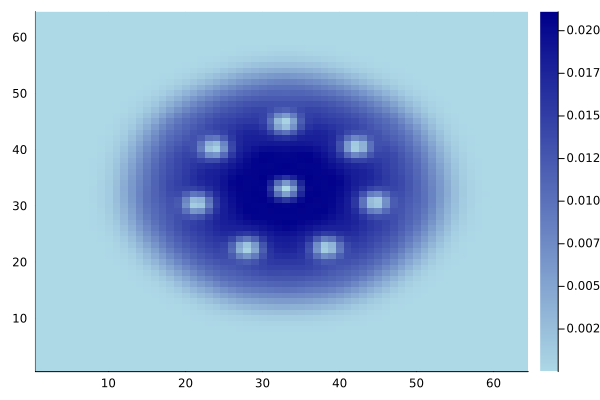

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)